In [1]:
! pip install qiskit
! pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from math import pi
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

In [3]:
# initialize registers and build quantum circuit
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

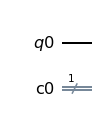

In [4]:
qc.draw("mpl")

### Step 1: Create Superposition

In [5]:
# apply hadamard
qc.h(q[0])

### Step 2: Phase Gate to create relative phase

In [6]:
# apply phase gate
qc.p(pi/4,q[0])

In [7]:
# state vector
psi = Statevector(qc)
psi.draw("latex")

<IPython.core.display.Latex object>

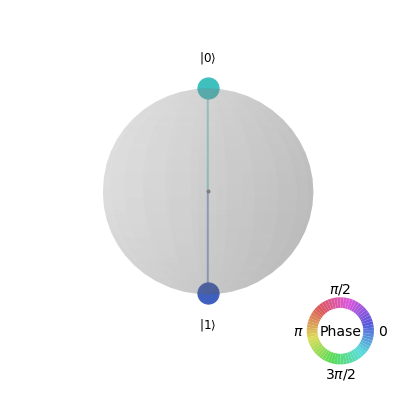

In [8]:
# look the relative phase
plot_state_qsphere(qc)

### Apply hadamard gate again

In [9]:
# apply hadamard
qc.h(q[0])

### Make measurements
The relative phase must affect the probabilities of the post-measurement states.

In [10]:
# perform a measurement
qc.measure(q[0],c[0])

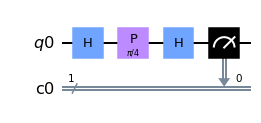

In [11]:
qc.draw("mpl")

In [12]:
# simulate in an ideal quantum computer
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'1': 165, '0': 859}


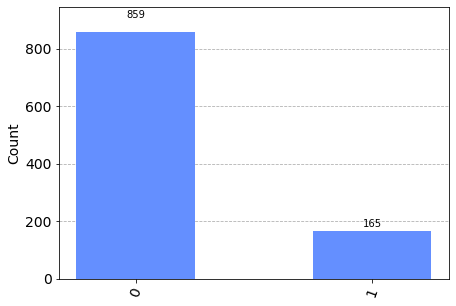

In [13]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)